In [12]:
!pip install polygon-api-client
!pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.1 MB 2.8 MB/s eta 0:00:03
   ------ --------------------------------- 1.3/8.1 MB 2.8 MB/s eta 0:00:03
   ---------- ----------------------------- 2.1/8.1 MB 2.8 MB/s eta 0:00:03
   ----------- ---------------------------- 2.4/8.1 MB 2.9 MB/s eta 0:00:02
   ------------ --------------------------- 2.6/8.1 MB 2.3 MB/s eta 0:00:03
   --------------- ------------------------ 3.1/8.1 MB 2.3 MB/s eta 0:00:03
   -------------------- ------------------- 4.2/8.1 MB 2.7 MB/s eta 0:00:02
   ------------------------ --------------- 5.0/8.1 MB 2.8 MB/s eta 0:00:02
   ----------------------------- ---------- 6.0/8.1 MB 3.1 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.1 MB 3.2 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 3.3 MB/s eta 0:00:01
   -----------------------

In [13]:
import pandas as pd
from polygon import RESTClient
import matplotlib as plt

In [14]:
key = open("api_key.txt").read()
client = RESTClient(key)

In [15]:
ticker = "SPY"
aggs = []
for day in client.get_aggs(ticker=ticker, multiplier=1, timespan="day", from_="2020-01-01", to="2025-05-01"):
    aggs.append(day)
aggs


[Agg(open=414.9, high=419.67, low=414.67, close=419.23, volume=97177195.0, vwap=417.1828, timestamp=1684382400000, transactions=672492, otc=None),
 Agg(open=420.17, high=420.72, low=417.35, close=418.62, volume=103793317.0, vwap=419.0232, timestamp=1684468800000, transactions=642871, otc=None),
 Agg(open=418.64, high=420.39, low=417.35, close=418.79, volume=60717899.0, vwap=419.037, timestamp=1684728000000, transactions=493531, otc=None),
 Agg(open=417.08, high=418.722, low=413.68, close=414.09, volume=86383493.0, vwap=415.8938, timestamp=1684814400000, transactions=624936, otc=None),
 Agg(open=412.42, high=412.82, low=409.8795, close=411.09, volume=89201678.0, vwap=411.2268, timestamp=1684900800000, transactions=673413, otc=None),
 Agg(open=414.74, high=416.16, low=412.4101, close=414.65, volume=90961606.0, vwap=413.9115, timestamp=1684987200000, transactions=672404, otc=None),
 Agg(open=415.33, high=420.77, low=415.25, close=420.02, volume=93829975.0, vwap=418.9092, timestamp=1685073

In [16]:
data = []
for agg in aggs:
    data.append({
        "date": agg.timestamp,
        "open": agg.open,
        "low": agg.low,
        "high": agg.high,
        "close": agg.close,
        "volume": agg.volume,
        "transactions": agg.transactions,
        "vwap": agg.vwap
    })

print(data)

[{'date': 1684382400000, 'open': 414.9, 'low': 414.67, 'high': 419.67, 'close': 419.23, 'volume': 97177195.0, 'transactions': 672492, 'vwap': 417.1828}, {'date': 1684468800000, 'open': 420.17, 'low': 417.35, 'high': 420.72, 'close': 418.62, 'volume': 103793317.0, 'transactions': 642871, 'vwap': 419.0232}, {'date': 1684728000000, 'open': 418.64, 'low': 417.35, 'high': 420.39, 'close': 418.79, 'volume': 60717899.0, 'transactions': 493531, 'vwap': 419.037}, {'date': 1684814400000, 'open': 417.08, 'low': 413.68, 'high': 418.722, 'close': 414.09, 'volume': 86383493.0, 'transactions': 624936, 'vwap': 415.8938}, {'date': 1684900800000, 'open': 412.42, 'low': 409.8795, 'high': 412.82, 'close': 411.09, 'volume': 89201678.0, 'transactions': 673413, 'vwap': 411.2268}, {'date': 1684987200000, 'open': 414.74, 'low': 412.4101, 'high': 416.16, 'close': 414.65, 'volume': 90961606.0, 'transactions': 672404, 'vwap': 413.9115}, {'date': 1685073600000, 'open': 415.33, 'low': 415.25, 'high': 420.77, 'close

In [17]:
sp500 = pd.DataFrame(data)
sp500.index = pd.to_datetime(sp500.date, unit="ms").dt.date #breaks val to ms and then identify date
sp500.drop(columns=["date"],inplace=True)
sp500.head()

,open,low,high,close,volume,transactions,vwap
date,,,,,,,
2023-05-18,414.90,414.6700,419.670,419.23,97177195.0,672492,417.1828
2023-05-19,420.17,417.3500,420.720,418.62,103793317.0,642871,419.0232
2023-05-22,418.64,417.3500,420.390,418.79,60717899.0,493531,419.0370
2023-05-23,417.08,413.6800,418.722,414.09,86383493.0,624936,415.8938
2023-05-24,412.42,409.8795,412.820,411.09,89201678.0,673413,411.2268


In [18]:
print(sp500)

              open       low      high   close       volume  transactions  \
date                                                                        
2023-05-18  414.90  414.6700  419.6700  419.23   97177195.0        672492   
2023-05-19  420.17  417.3500  420.7200  418.62  103793317.0        642871   
2023-05-22  418.64  417.3500  420.3900  418.79   60717899.0        493531   
2023-05-23  417.08  413.6800  418.7220  414.09   86383493.0        624936   
2023-05-24  412.42  409.8795  412.8200  411.09   89201678.0        673413   
...            ...       ...       ...     ...          ...           ...   
2025-04-25  546.65  543.6900  551.0500  550.64   60939590.0        562251   
2025-04-28  551.39  545.0200  553.5500  550.85   47602355.0        472023   
2025-04-29  548.91  548.5500  555.4500  554.32   47775121.0        474829   
2025-04-30  547.57  541.5200  556.5200  554.54   93094138.0        707089   
2025-05-01  560.37  557.8600  564.0699  558.47   63171646.0        585864   

<Axes: xlabel='date'>

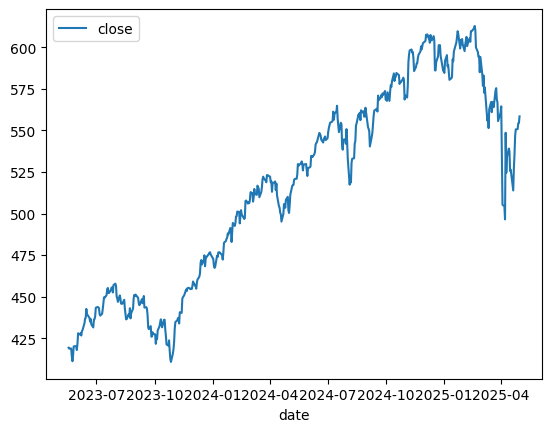

In [19]:
sp500.plot.line(y="close", use_index=True)

In [21]:
sp500["Tommorow"] = sp500["close"].shift(-1)
sp500

,open,low,high,close,volume,transactions,vwap,Tommorow
date,,,,,,,,
2023-05-18,414.90,414.6700,419.6700,419.23,97177195.0,672492,417.1828,418.62
2023-05-19,420.17,417.3500,420.7200,418.62,103793317.0,642871,419.0232,418.79
2023-05-22,418.64,417.3500,420.3900,418.79,60717899.0,493531,419.0370,414.09
2023-05-23,417.08,413.6800,418.7220,414.09,86383493.0,624936,415.8938,411.09
2023-05-24,412.42,409.8795,412.8200,411.09,89201678.0,673413,411.2268,414.65
...,...,...,...,...,...,...,...,...
2025-04-25,546.65,543.6900,551.0500,550.64,60939590.0,562251,548.3551,550.85
2025-04-28,551.39,545.0200,553.5500,550.85,47602355.0,472023,549.7273,554.32
2025-04-29,548.91,548.5500,555.4500,554.32,47775121.0,474829,552.8584,554.54


In [23]:
sp500["Target"] = (sp500["Tommorow"] > sp500["close"]).astype(int)
sp500

,open,low,high,close,volume,transactions,vwap,Tommorow,Target
date,,,,,,,,,
2023-05-18,414.90,414.6700,419.6700,419.23,97177195.0,672492,417.1828,418.62,0
2023-05-19,420.17,417.3500,420.7200,418.62,103793317.0,642871,419.0232,418.79,1
2023-05-22,418.64,417.3500,420.3900,418.79,60717899.0,493531,419.0370,414.09,0
2023-05-23,417.08,413.6800,418.7220,414.09,86383493.0,624936,415.8938,411.09,0
2023-05-24,412.42,409.8795,412.8200,411.09,89201678.0,673413,411.2268,414.65,1
...,...,...,...,...,...,...,...,...,...
2025-04-25,546.65,543.6900,551.0500,550.64,60939590.0,562251,548.3551,550.85,1
2025-04-28,551.39,545.0200,553.5500,550.85,47602355.0,472023,549.7273,554.32,1
2025-04-29,548.91,548.5500,555.4500,554.32,47775121.0,474829,552.8584,554.54,1


In [ ]:
#The target and the open price are non-linear hence using regression is not viable(I thought it would have been regression because its a literal line)

###Understanding the Data

In [27]:
!pip install seaborn

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

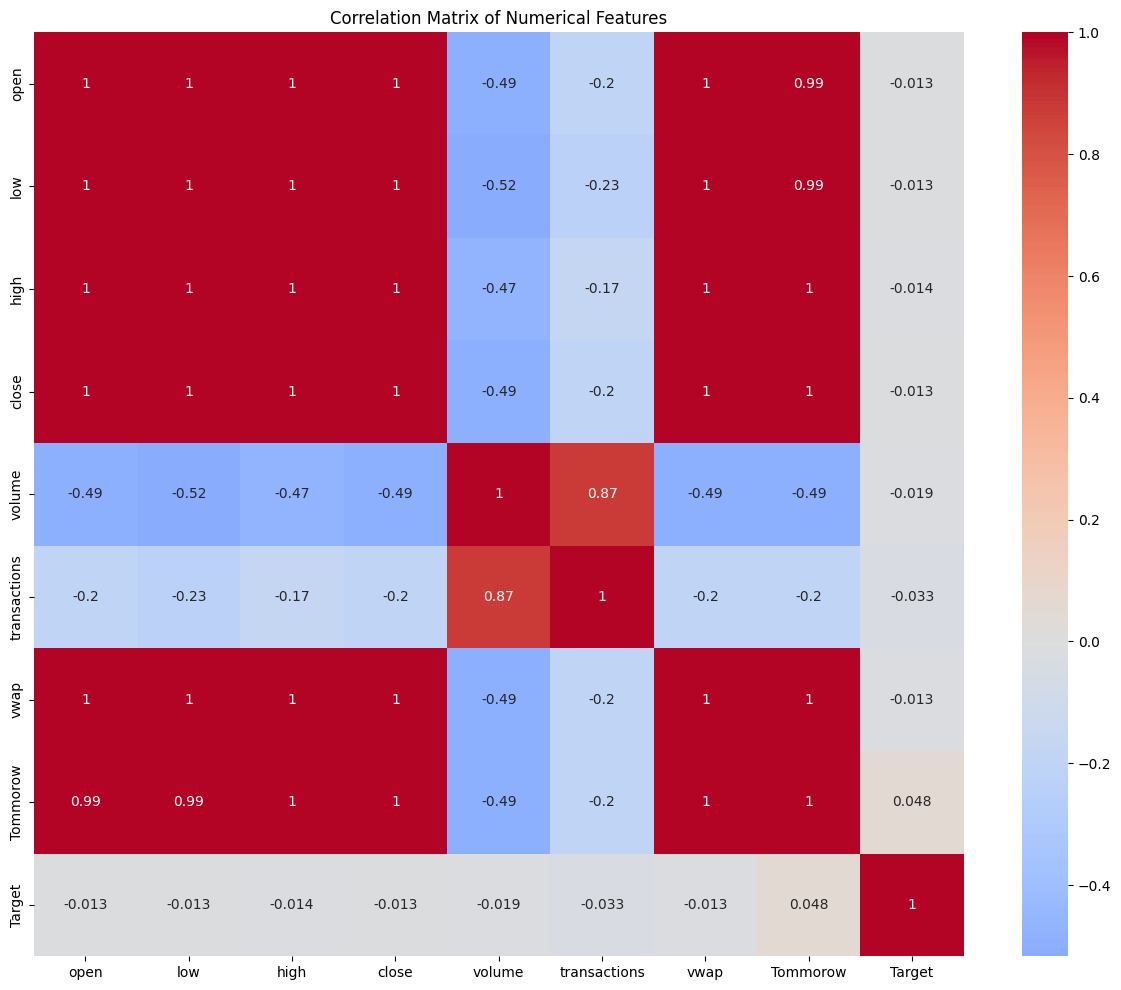

In [37]:
correlation_matrix = sp500.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

###Training the ML Algorithm

In [24]:
!pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.1 MB 2.0 MB/s eta 0:00:06
   --- ------------------------------------ 1.0/11.1 MB 1.9 MB/s eta 0:00:06
   --- ------------------------------------ 1.0/11.1 MB 1.9 MB/s eta 0:00:06
   --- ------------------------------------ 1.0/11.1 MB 1.9 MB/s eta 0:00:06
   --- ------------------------------------ 1.0/11.1 MB 1.9 MB/s eta 0:00:06
   --- ------------------------------------ 1.0/11.1 MB 1.9 MB/s eta 0:00:06
   --- ------------------------------------ 1.0/11.1 MB 1.9 MB/s eta 0:00:06
   ---- ----------------------------------- 1.3/11.1 MB 632.8 kB/s eta 0:00:16
   ------- -------------------------------- 2.1/11.1 MB 946.9 kB/s eta 0:00:10
   --------- ------------------------------ 2.6/11.1 MB 1.1 MB/s eta 0:00:08
   ------------ --------------------------- 3.4/11.1 MB 1.3 MB/s eta 0:00:06
   ------

In [48]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=1000, min_samples_split=100, random_state=1)

train = sp500.iloc[:-50]
test = sp500.iloc[-50:]

predictors = ["close", "volume", "open", "high", "low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, n_estimators=1000, random_state=1)

In [49]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score
predictions = model.predict(test[predictors])


In [50]:
import pandas as pd
predictions = pd.Series(predictions, index=test.index)

In [51]:
precision_score(test["Target"], predictions)

0.5319148936170213